In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.05
data_size = 40
_x = np.random.uniform(size=(data_size,1),low=0,high=10)
_y = _x + np.random.normal(size=(data_size,1))

x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])
w = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1,1]))
y_hat = tf.mul(x,w) + b

cost = tf.reduce_mean(tf.abs(y - y_hat))
gradient = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [3]:
init = tf.global_variables_initializer()
session = tf.Session()
tf.summary.scalar('learning_rate',learning_rate)
tf.summary.scalar('cost',cost)
merge = tf.summary.merge_all()
f = tf.summary.FileWriter('../../../log/',graph=session.graph)

In [4]:
session.run(init)
for i in range(100):
    result,_ = session.run([merge,gradient],feed_dict={x:_x,y:_y})
    f.add_summary(result,i)

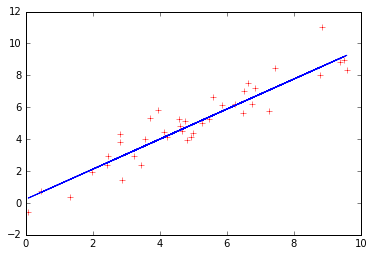

In [5]:

y__ = _x * w.eval(session) + b.eval(session)
plt.plot(_x,_y,'r+')
plt.plot(_x,y__)